In [88]:
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
import plotly.express as px  
import plotly.subplots as sp  
import plotly.graph_objects as go 

In [89]:
df = pd.read_csv("data/processed/Medicaldataset.csv")  


print("Filas, columnas:", df.shape)  
print("Variables:", df.columns.tolist())  
df.head(3)  

Filas, columnas: (1319, 9)
Variables: ['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'Blood sugar', 'CK-MB', 'Troponin', 'Result']


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative


In [154]:
sns.set_theme(style="whitegrid", palette="Blues", font="serif", font_scale=1)

# Referencias de nombres de variables del dataset

| Nombre original                | Nombre estandarizado |
|-------------------------------|---------------------|
| Age                           | age                 |
| Gender                        | gender              |
| Heart rate                    | hr                  |
| Systolic blood pressure       | sbp                 |
| Diastolic blood pressure      | dbp                 |
| Blood sugar                   | bs                  |
| CK-MB                         | ckmb                |
| Troponin                      | trop                |
| Result                        | res                 |


## 💓 Frecuencia cardíaca (Heart Rate)

### Valores de Referencia (Adultos)

| Parámetro              | Unidad | Normal     | Bradicardia       | Taquicardia     |
|------------------------|--------|------------|-------------------|-----------------|
| **Heart Rate (reposo)**| bpm    | 60–100     | < 60 bpm          | > 100 bpm       |

- **Bradicardia**: frecuencia < 60 bpm. No siempre patológica (común en atletas, sueño); puede causar síntomas si es significativa.
- **Taquicardia**: frecuencia > 100 bpm en reposo. Puede ser fisiológica (ejercicio) o patológica, con riesgo de síncope y eventos trombóticos.

**Fuente de validación científica:**

- Medical News Today - Tachycardia vs. bradycardia
  <https://www.medicalnewstoday.com/articles/tachycardia-vs-bradycardia>

- Cleveland Clinic - Bradycardia: Symptoms, Causes & Treatment
  <https://my.clevelandclinic.org/health/diseases/17841-bradycardia>

---

## 🩺 Presión Arterial Sistólica (Systolic Blood Pressure)

### Valores de Referencia (Adultos)

| Parámetro           | Unidad | Normal     | Elevado           | Etapa 1               | Etapa 2            | Crisis hipertensiva     |
|---------------------|--------|------------|-------------------|------------------------|---------------------|-------------------------|
| **SBP**             | mm Hg  | < 120      | 120–129           | 130–139                | ≥ 140                | ≥ 180                  |

- **Elevado** (120–129 mm Hg): riesgo aumentado, requiere cambios en estilo de vida.
- **Hipertensión etapa 1** (130–139): se inicia tratamiento si hay alto riesgo cardiovascular.
- **Hipertensión etapa 2** (≥ 140): indicador definitivo, se recomienda medicación.
- **Crisis hipertensiva** (≥ 180): emergencia médica inmediata si hay síntomas (dolor torácico, dificultad respiratoria...).

**Fuente de validación científica:**

- American Heart Association - Understanding Blood Pressure Readings
  <https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings>
- Harvard Health - A look at diastolic blood pressure
  <https://www.health.harvard.edu/heart-health/a-look-at-diastolic-blood-pressure>

---

## 🩺 Presión Arterial Diastólica (Diastolic Blood Pressure)

### Valores de Referencia (Adultos)

| Parámetro           | Unidad | Normal     | Hipotensión       | Etapa 1              | Etapa 2            | Crisis hipertensiva     |
|---------------------|--------|------------|-------------------|-----------------------|--------------------|-------------------------|
| **DBP**             | mm Hg  | < 80       | < 60              | 80–89                 | ≥ 90               | ≥ 120                   |

- **Normal**: diastólica menor de 80 mm Hg :contentReference[oaicite:3]{index=3}.
- **Hipotensión (presión baja)**: diastólica < 60 mm Hg. Puede causar mareo, síncope y aumentar riesgo en órganos.
- **Etapa 1 de hipertensión**: 80–89 mm Hg.
- **Etapa 2 de hipertensión**: ≥ 90 mm Hg.
- **Crisis hipertensiva**: diastólica ≥ 120 mm Hg, junto con sistólica ≥ 180, es emergencia médica..

### Contexto Clínico y Significado

- La presión diastólica mide la presión en las arterias entre latidos, cuando el corazón está en reposo.
- Una diastólica **muy baja (< 60 mm Hg)**, especialmente en ancianos, puede provocar cansancio, mareos y aumento de caídas.
- Aunque la sistólica suele recibir más atención en mayores de 50 años, la diastólica también importa: valores elevados reflejan riesgo cardiovascular.

**Fuente de validación científica:**

- American Heart Association - Understanding Blood Pressure Readings
  <https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings>
- Harvard Health - A look at diastolic blood pressure
  <https://www.health.harvard.edu/heart-health/a-look-at-diastolic-blood-pressure>

---

## 🍭 Glucemia (Blood Sugar)

### Valores de Referencia (Ayuno)

| Parámetro        | Unidad  | Normal     | Hipoglucemia       | Prediabetes         | Diabetes        |
|------------------|---------|------------|--------------------|---------------------|-----------------|
| **Blood Sugar**  | mg/dL   | 70–99      | < 70 (síntomas < 55)| 100–125             | ≥ 126           |

- **Hipoglucemia**: <70 mg/dL; síntomas comunes como sudoración, temblor, confusión; <55 suele ser sintomática.
- **Hiperglucemia**: ayuno >125 mg/dL, o >180 mg/dL posprandial; causa fatiga, sed, visión borrosa.

**Fuente de validación científica:**

- NCBI StatPearls - Blood Glucose
  <https://www.ncbi.nlm.nih.gov/books/NBK279364/>

- Mayo Clinic - Blood Glucose
  <https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451>

---

## 🧪 CK‑MB (Isoenzima MB de Creatina Quinasa)

(Unidad: ng/mL)

### Valores de Referencia (Adultos)

| Parámetro    | Unidad | Normal    | Elevado    | Crítico   |
|--------------|--------|-----------|------------|-----------|
| **CK‑MB**    | ng/mL  | < 5       | 5–10       | > 10      |
| **CK‑MB%**   | %      | < 1.0     | 1.0–2.0    | >2.0      |

### Criterios Diagnósticos para IAM

1. CK‑MB ≥5 ng/mL + CK‑MB% >2%  
2. Aumento >50 % en 2 muestras consecutivas (3 h de separación)

### Contexto Clínico

- Pico a las 12–24 h tras el inicio de síntomas  
- Retorno a valores basales en 48–72 h  
- Valores >10 ng/mL sugieren infarto extenso

**Fuentes de validación científica:**

- University of Michigan MLabs – CK‑MB Isoenzyme  
  <https://mlabs.umich.edu/tests/creatine-kinase-total-and-mb-isoenzyme>
- PathologyOutlines – Cardiac CK  
  <https://www.pathologyoutlines.com/topic/chemistrycardiacck.html>

---

## 🧪 Troponina T (solo)

(Unidad: ng/mL; 1 ng/mL = 1,000 ng/L)

### Valores de Referencia (Adultos)

| Parámetro          | Unidad | Normal     | Elevado        | Crítico        |
|--------------------|--------|------------|----------------|----------------|
| **Troponin T**     | ng/mL  | < 0.01     | 0.01–0.13      | ≥ 0.14         |
| **hs‑Troponin T**  | ng/mL  | < 0.014    | 0.014–0.052    | ≥ 0.053        |

- **Troponina T convencional**: <0.01 ng/mL normal; >0.14 sugiere infarto :contentReference[oaicite:9]{index=9}.
- **hs‑Troponin T**: >99.º percentil o ≥0.053 ng/mL es crítico y altamente sugestivo de IAM :contentReference[oaicite:10]{index=10}.

**Fuentes de validación científica:**

- PathologyOutlines – Cardiac Troponins  
  <https://www.pathologyoutlines.com/topic/chemistrycardiactroponins.html>
- University of Michigan MLabs – High‑Sensitivity Troponin T  
  <https://mlabs.umich.edu/tests/troponin-t-high-sensitivity>

---

## 📋 Resumen General

| Variable            | Unidad     | Normal                   | Elevado / Bajo                                           | Crítico / IAM / Crisis                                 |
|---------------------|------------|--------------------------|----------------------------------------------------------|--------------------------------------------------------|
| HR (reposo)         | bpm        | 60–100                   | —                                                        | < 60 (bradicardia), > 100 (taquicardia)                |
| SBP                 | mm Hg      | < 120                    | 120–129 (elevado)                                       | ≥ 130 etapa 1–2; ≥ 180 crisis                          |
| DBP                 | mm Hg      | < 80                     | < 60 hipotensión; 80–89 etapa 1                         | ≥ 90 etapa 2; ≥ 120 crisis                             |
| Glucemia ayuno      | mg/dL      | 70–99                    | < 70 hipoglucemia; 100–125 prediabetes                  | ≥ 126 diabetes                                        |
| CK‑MB               | ng/mL      | < 5                      | 5–10 elevado                                             | >10 infarto extenso                                  |
| CK‑MB %             | %          | < 1.0                    | 1.0–2.0 elevado                                          | >2.0                                                  |
| Troponina T         | ng/mL      | < 0.01                   | 0.01–0.13 elevado                                       | ≥ 0.14                                               |
| hs‑Troponin T       | ng/mL      | < 0.014                  | 0.014–0.052 elevado                                     | ≥ 0.053                                               |

---


Valores faltantes por columna:
age       0
gender    0
hr        0
sbp       0
dbp       0
bs        0
ckmb      0
trop      0
res       0
dtype: int64


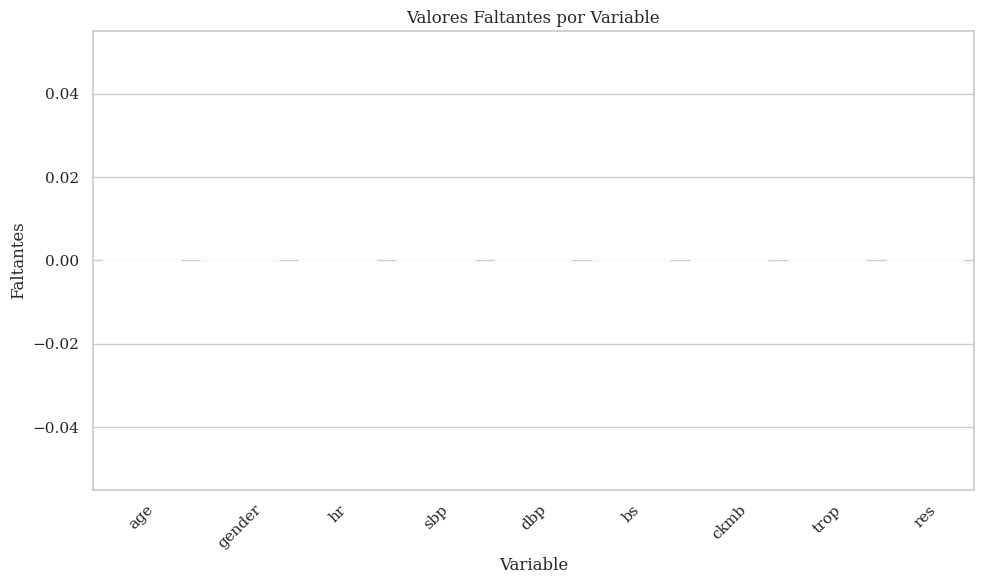

In [155]:
print("Valores faltantes por columna:")  
print(df.isnull().sum())  

missing = df.isnull().sum().reset_index()  
missing.columns = ['Variable', 'Faltantes']  

# Gráfico interactivo  
plt.figure(figsize=(10, 6))
sns.barplot(data=missing, x='Variable', y='Faltantes')
plt.title('Valores Faltantes por Variable')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [91]:
df.rename(columns={'Age': 'age',
                    'Gender': 'gender',
                    'Heart rate': 'hr',
                    'Systolic blood pressure': 'sbp',
                    'Diastolic blood pressure': 'dbp',
                    'Blood sugar': 'bs',
                    'CK-MB': 'ckmb',
                    'Troponin': 'trop',
                    'Result': 'res',},
                     inplace=True)
df

,age,gender,hr,sbp,dbp,bs,ckmb,trop,res
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [128]:
print('Dimesniones: Filas - Columnas')
print(df.shape)
print('                    ')
print('Información General:')
print(df.info())

Dimesniones: Filas - Columnas
(1316, 9)
                    
Información General:
<class 'pandas.core.frame.DataFrame'>
Index: 1316 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1316 non-null   int64  
 1   gender  1316 non-null   int64  
 2   hr      1316 non-null   int64  
 3   sbp     1316 non-null   int64  
 4   dbp     1316 non-null   int64  
 5   bs      1316 non-null   float64
 6   ckmb    1316 non-null   float64
 7   trop    1316 non-null   float64
 8   res     1316 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 102.8+ KB
None


In [93]:
df.describe()  

,age,gender,hr,sbp,dbp,bs,ckmb,trop
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000


In [94]:
df['res'].value_counts()

res
positive    810
negative    509
Name: count, dtype: int64

In [95]:
df.isnull()

,age,gender,hr,sbp,dbp,bs,ckmb,trop,res
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1314,False,False,False,False,False,False,False,False,False
1315,False,False,False,False,False,False,False,False,False
1316,False,False,False,False,False,False,False,False,False
1317,False,False,False,False,False,False,False,False,False


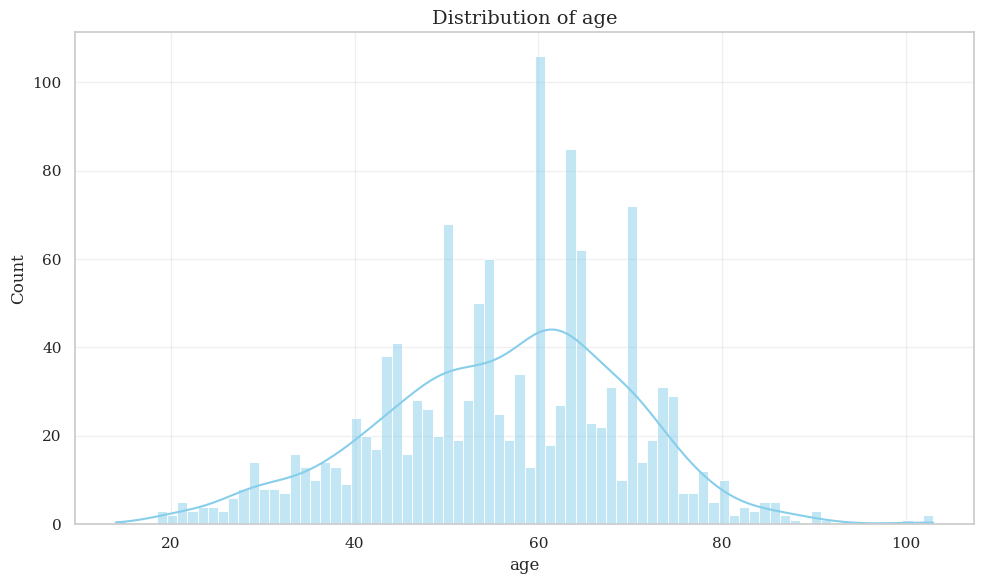

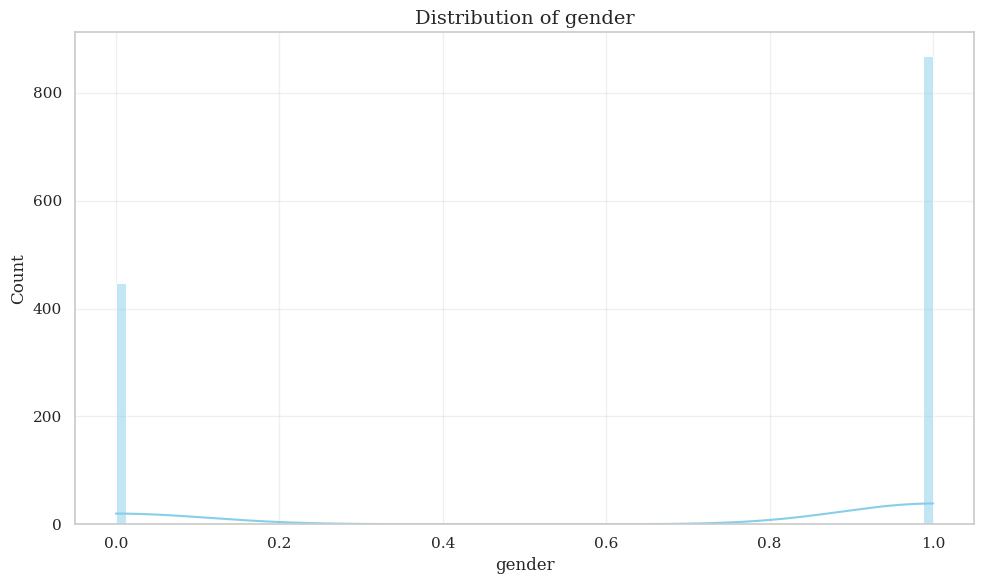

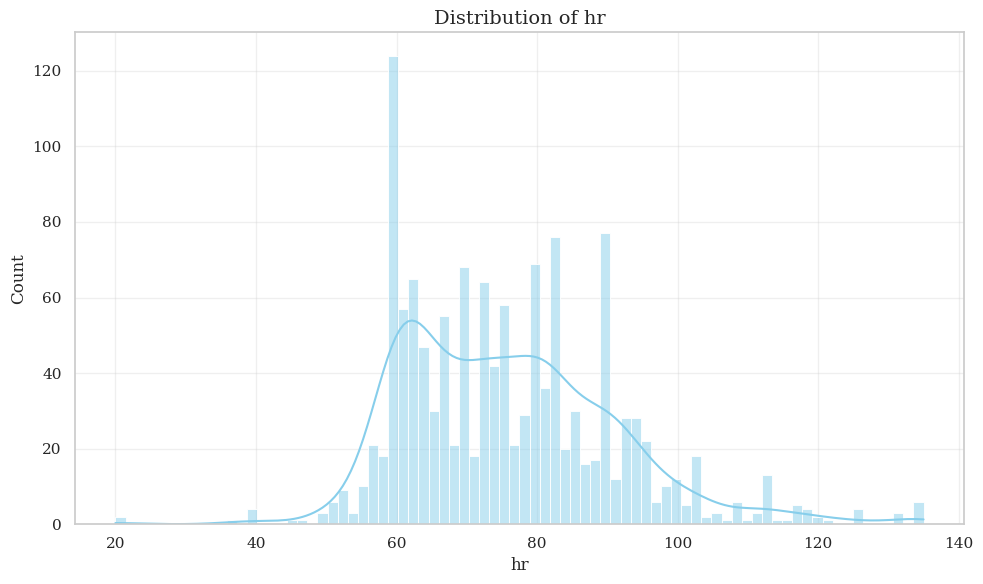

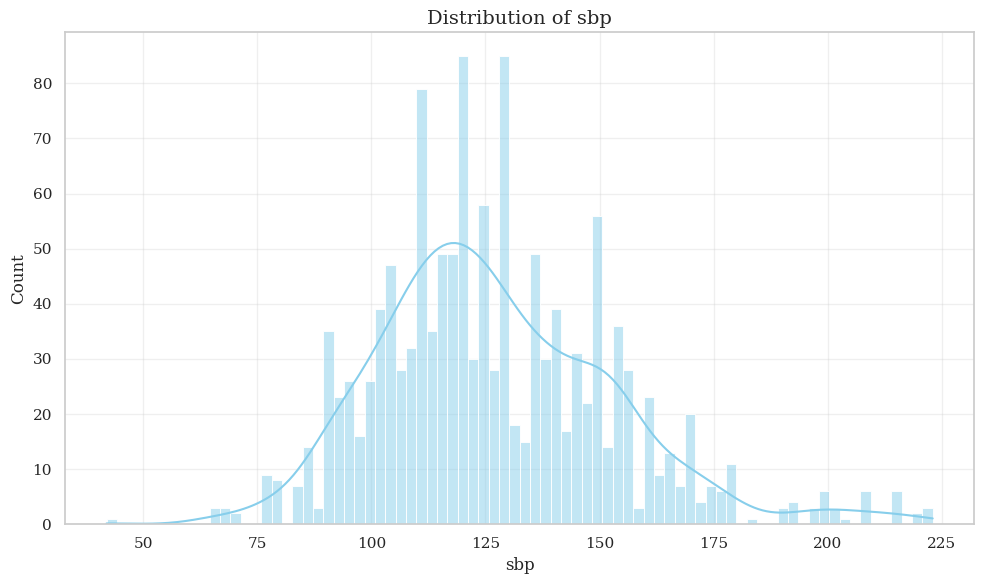

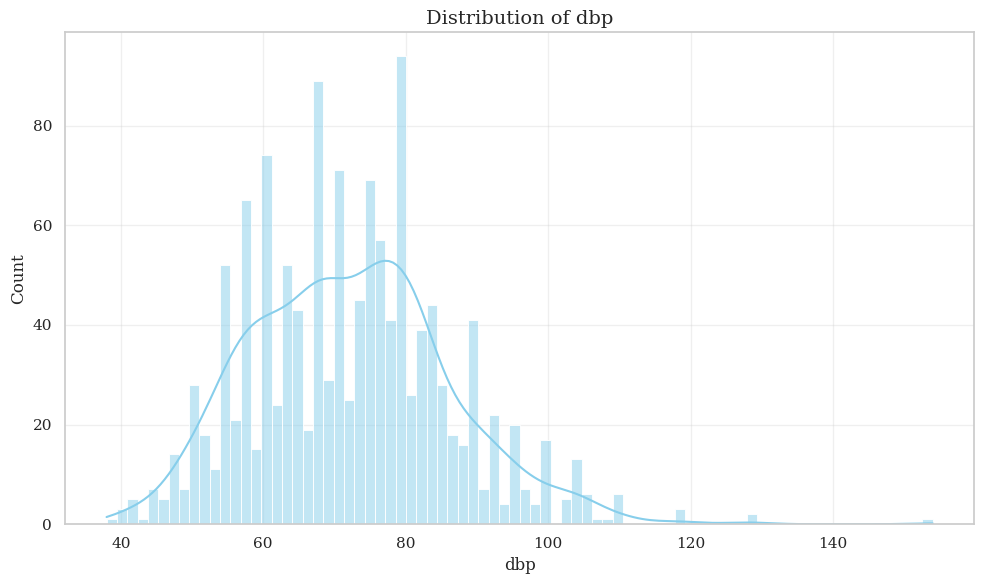

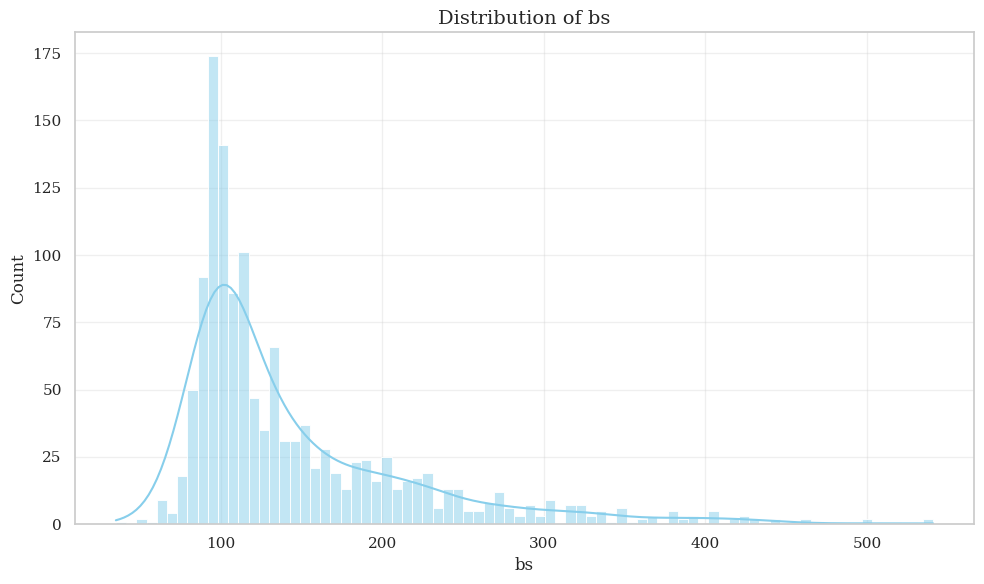

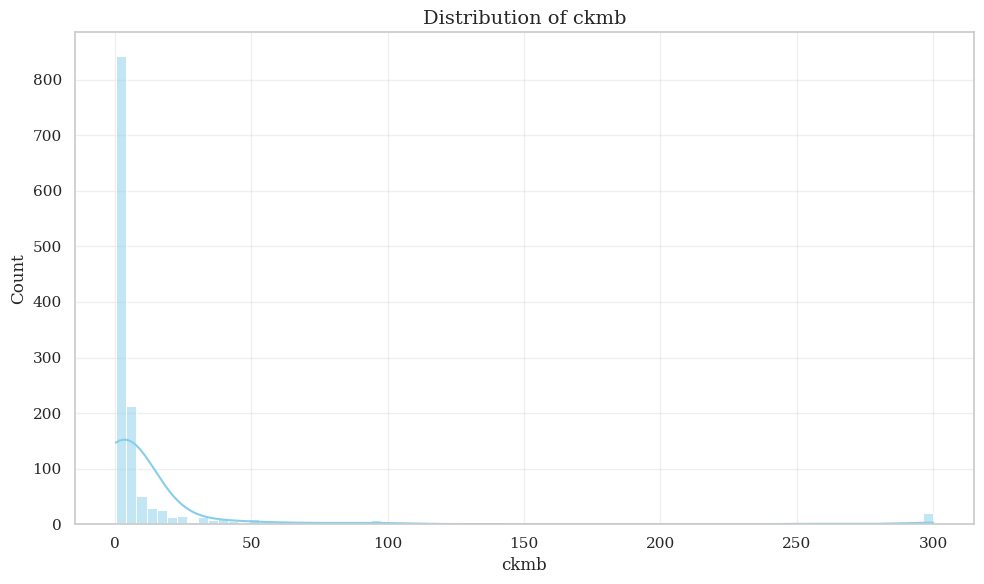

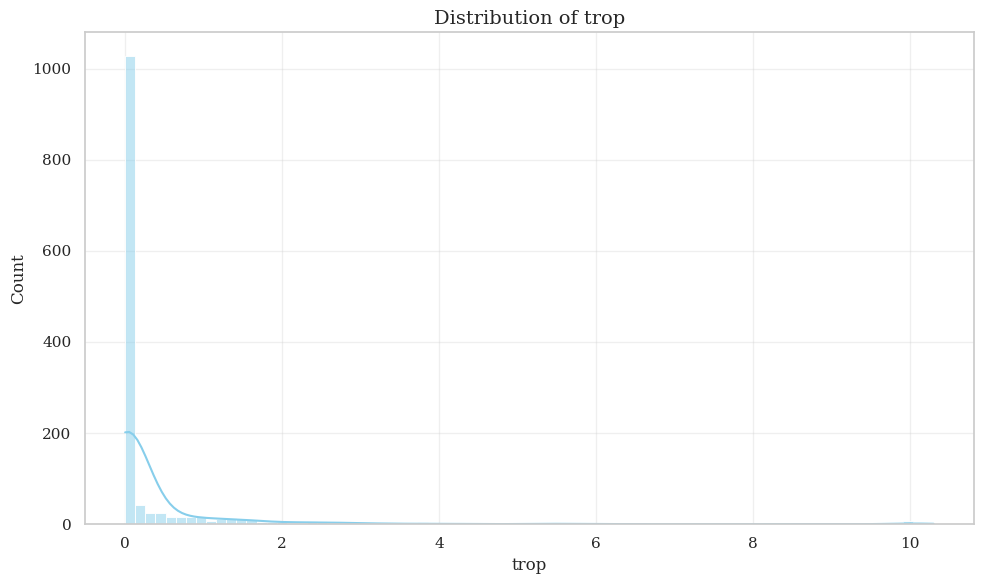

In [156]:
numeric_cols = df.select_dtypes(include='number').columns

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(10, 6))
    sns.histplot(
        data=df,
        x=col,
        bins=80,
        kde=True,
        color='skyblue',       
    )
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

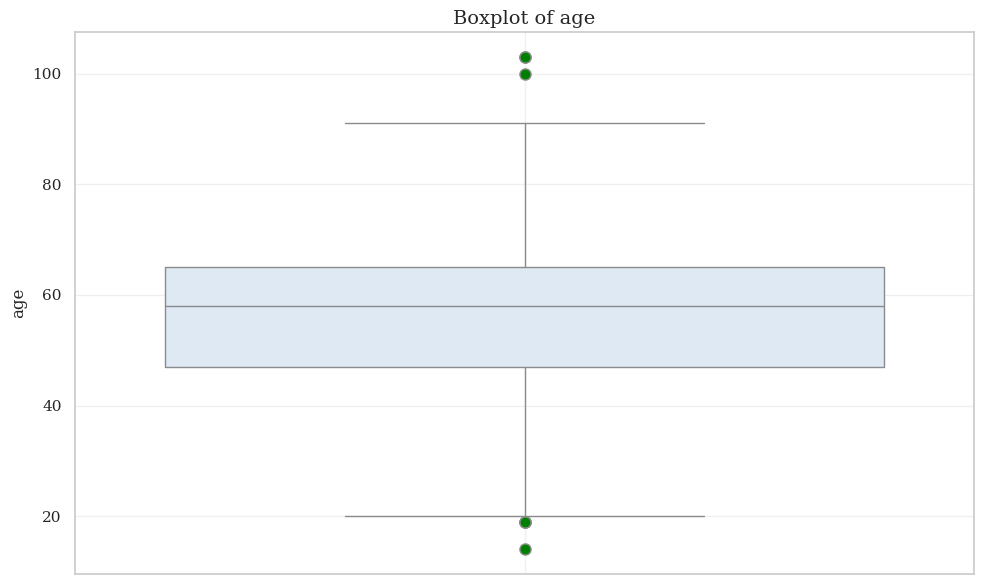

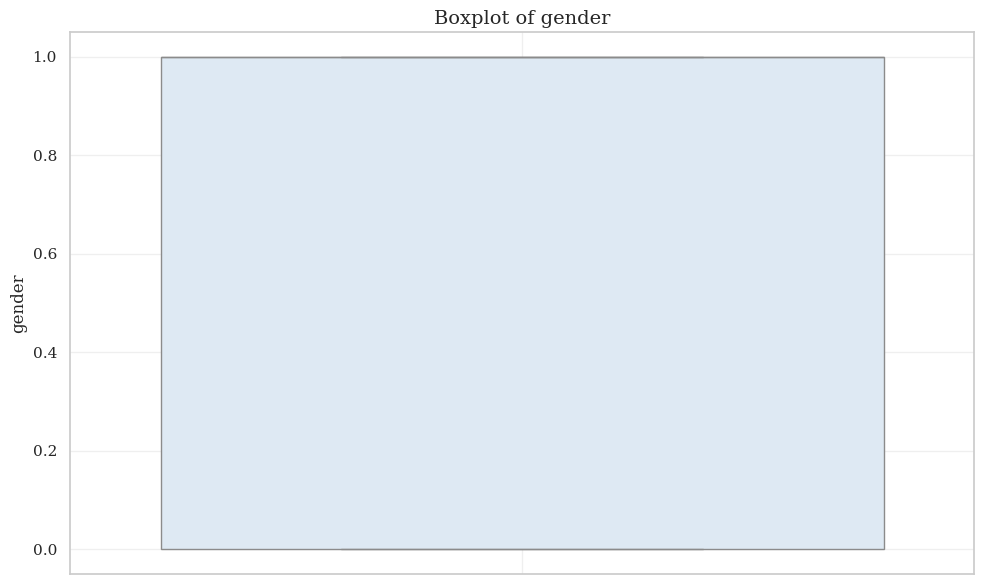

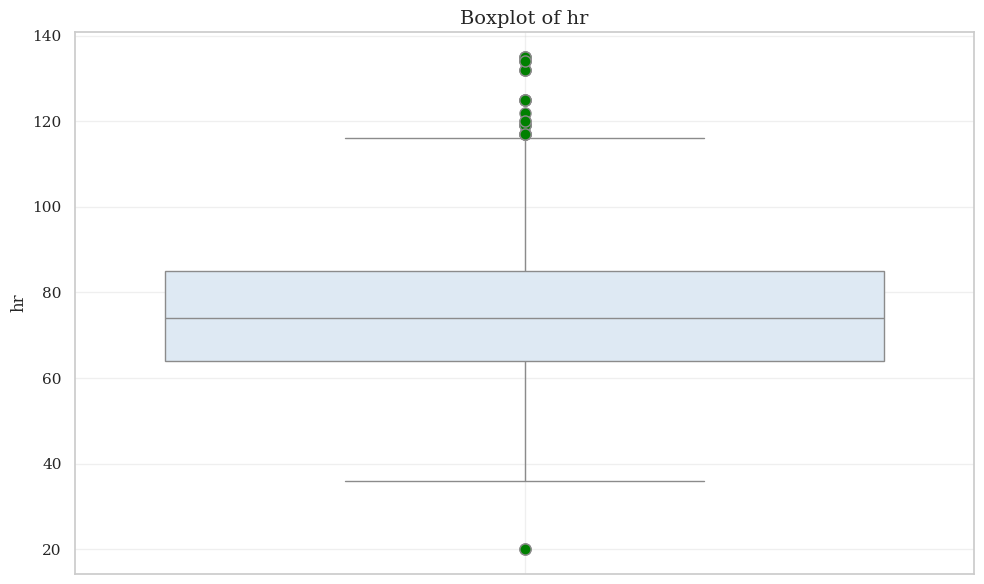

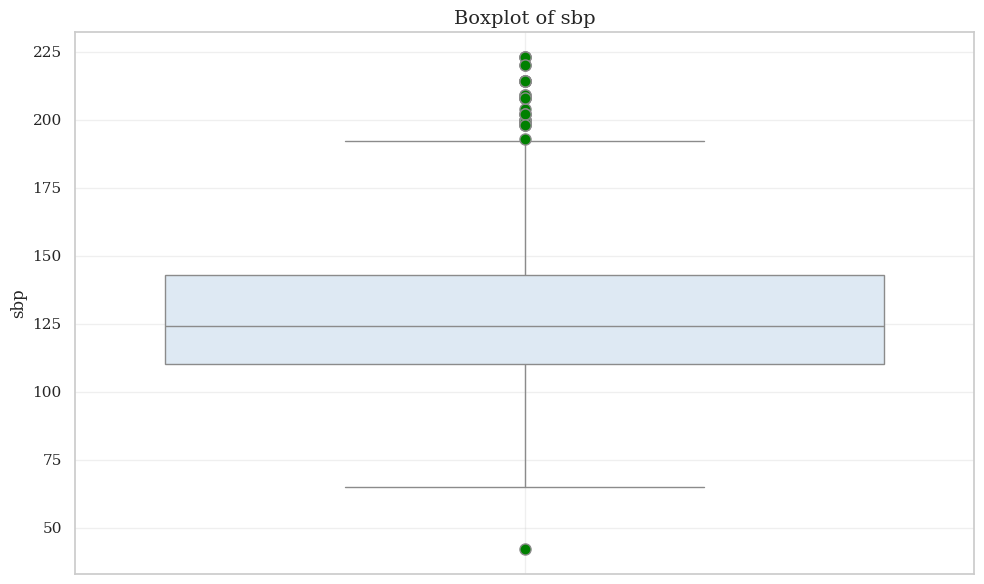

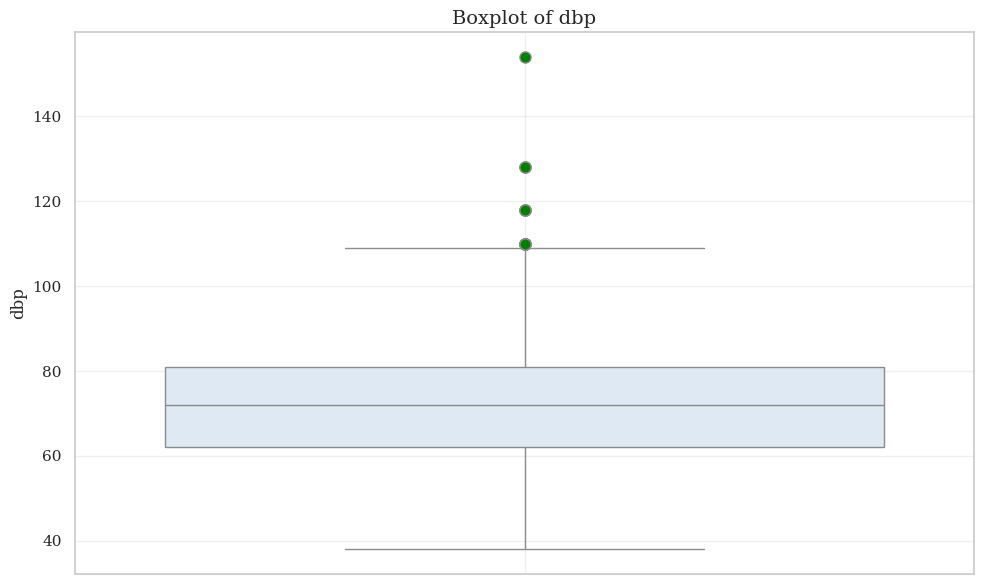

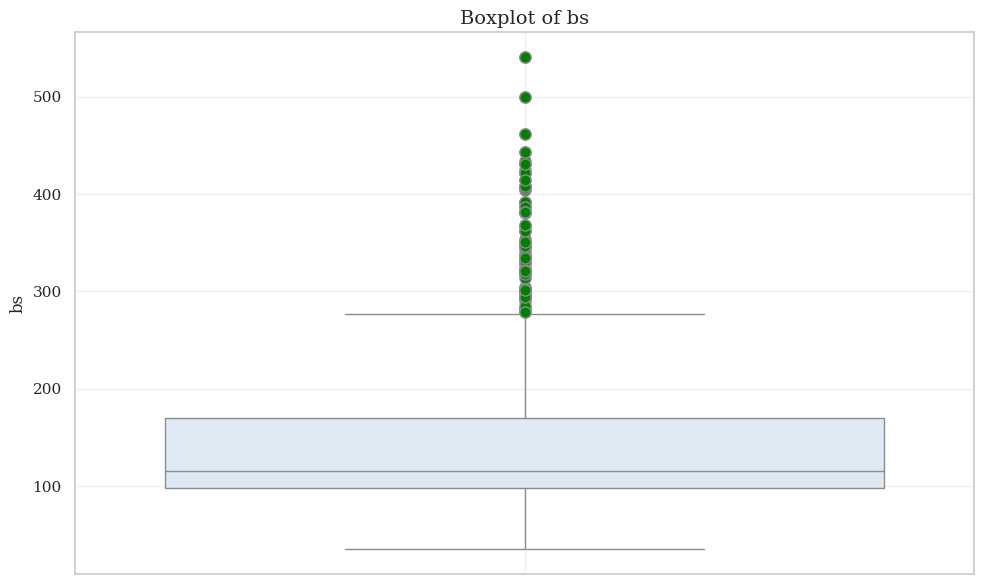

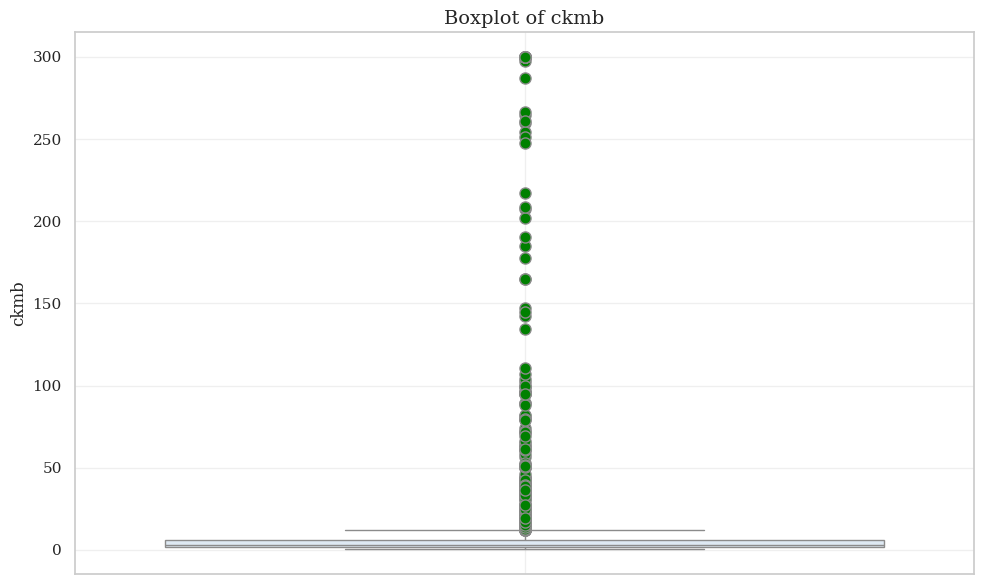

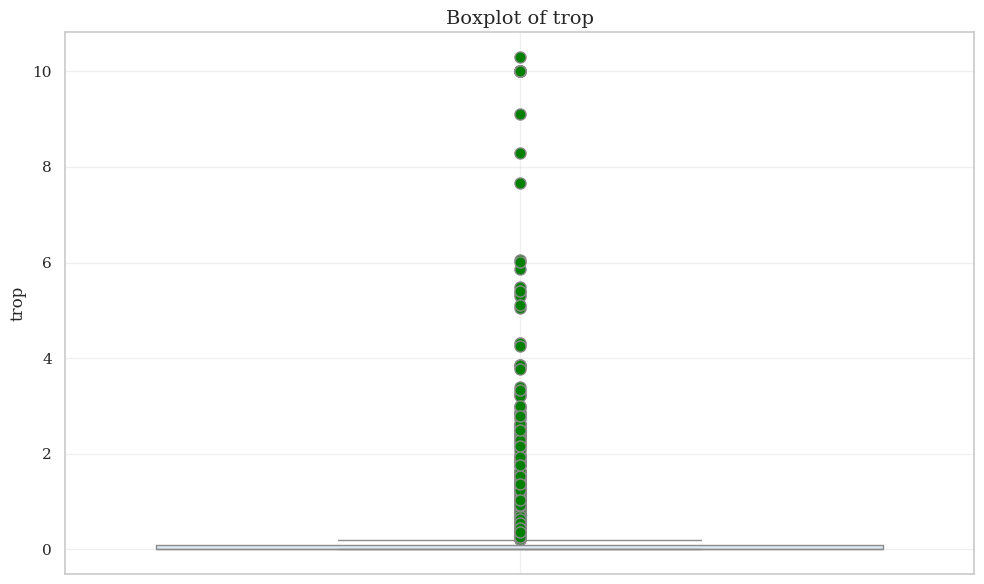

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df,
        y=col,
        flierprops={'marker': 'o', 'markerfacecolor': 'green', 'markersize': 8, 'linestyle': 'none'}
    )
    plt.title(f'Boxplot of {col}', fontsize=14, )
    plt.ylabel(col, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## Eliminando un registro de hr
Se decide eliminar un registro de Heart Rate = 1111 debido a que era solo uno, es un valor prácticamete alejado de la realidad clínica y más cercano a un error al introducirlo, lo cual pordría provocar ruido a la hora de entrenar el modelo.

In [149]:
df = df[df['hr'] <= 500]
df.hr

0       66
1       94
2       64
3       70
4       64
        ..
1314    94
1315    84
1316    85
1317    58
1318    94
Name: hr, Length: 1316, dtype: int64

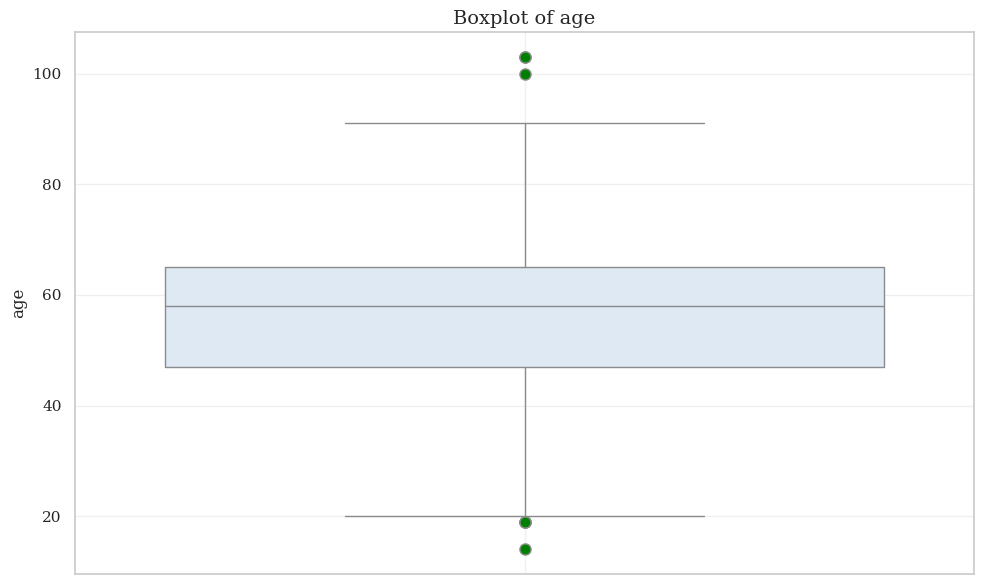

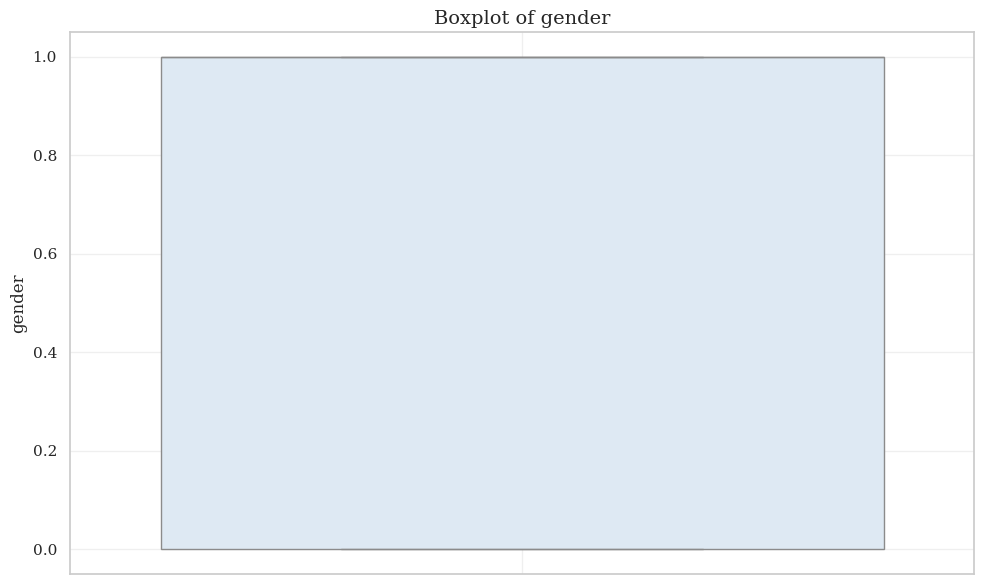

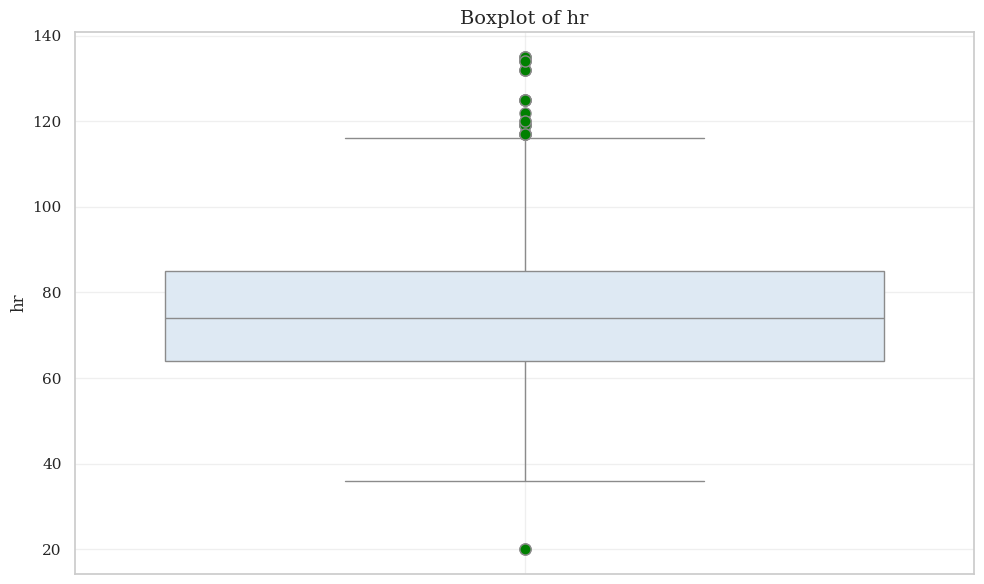

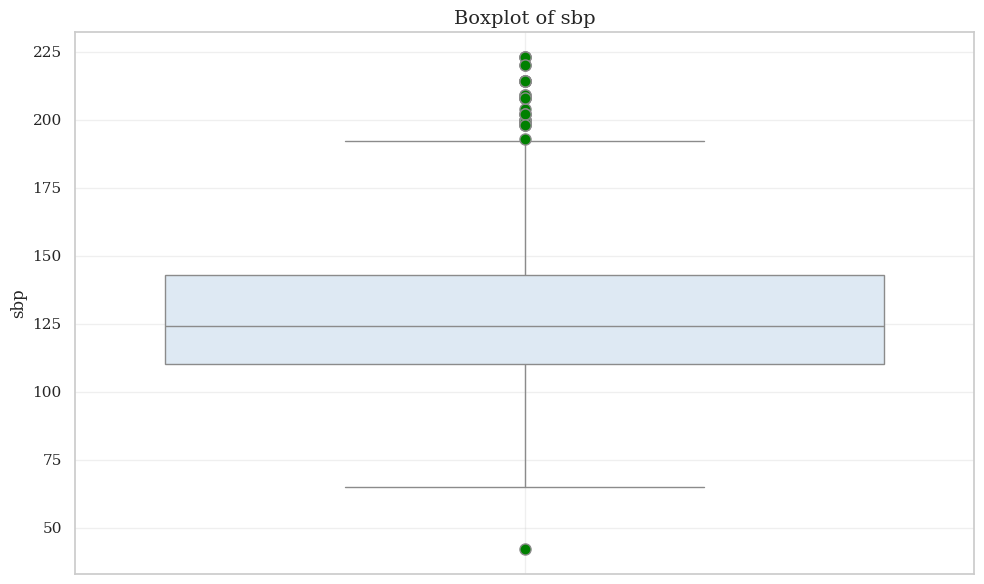

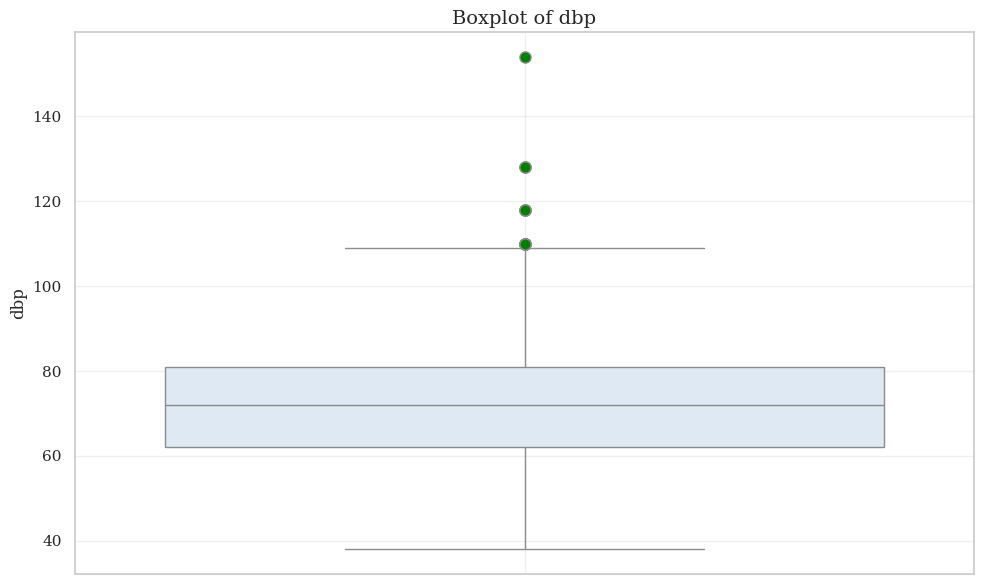

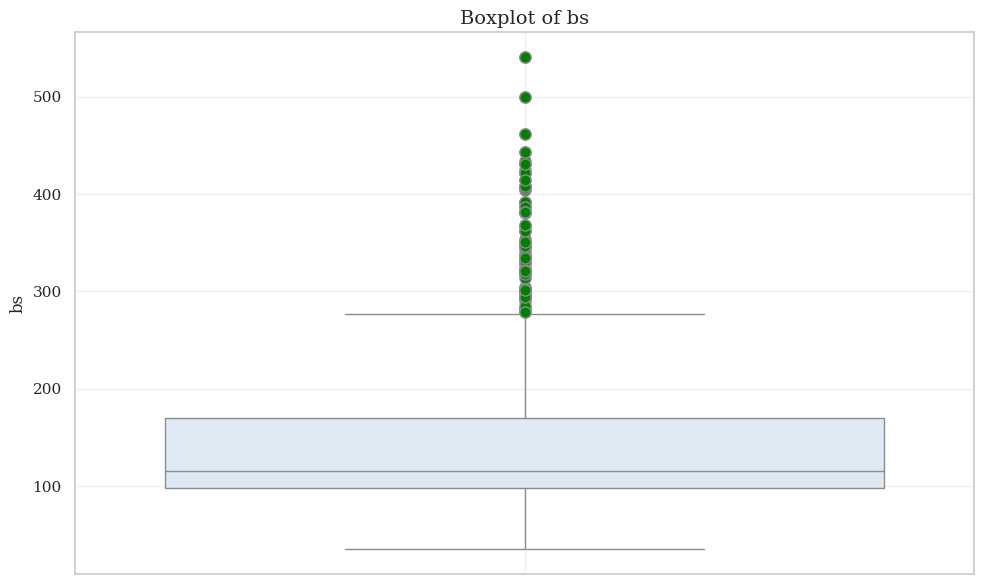

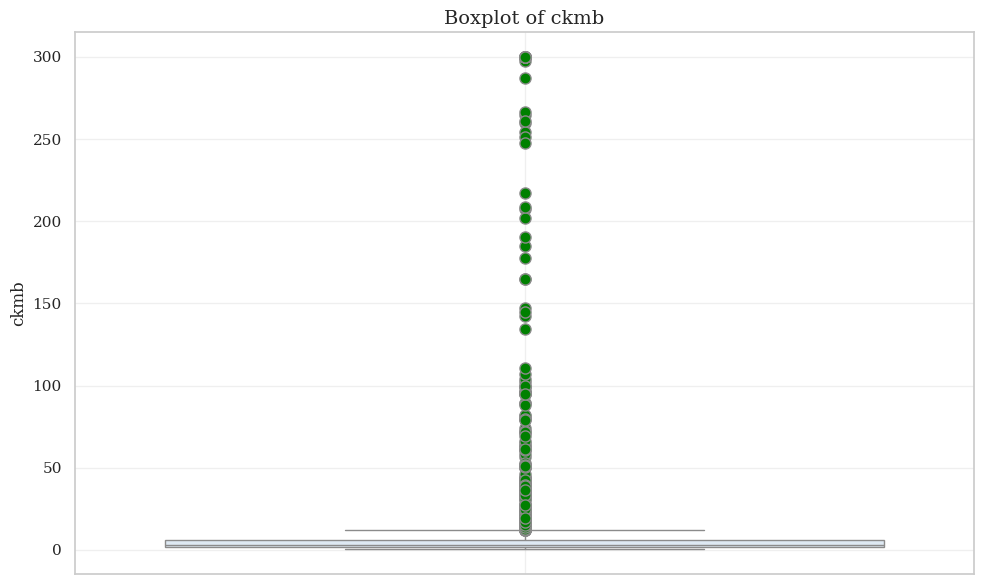

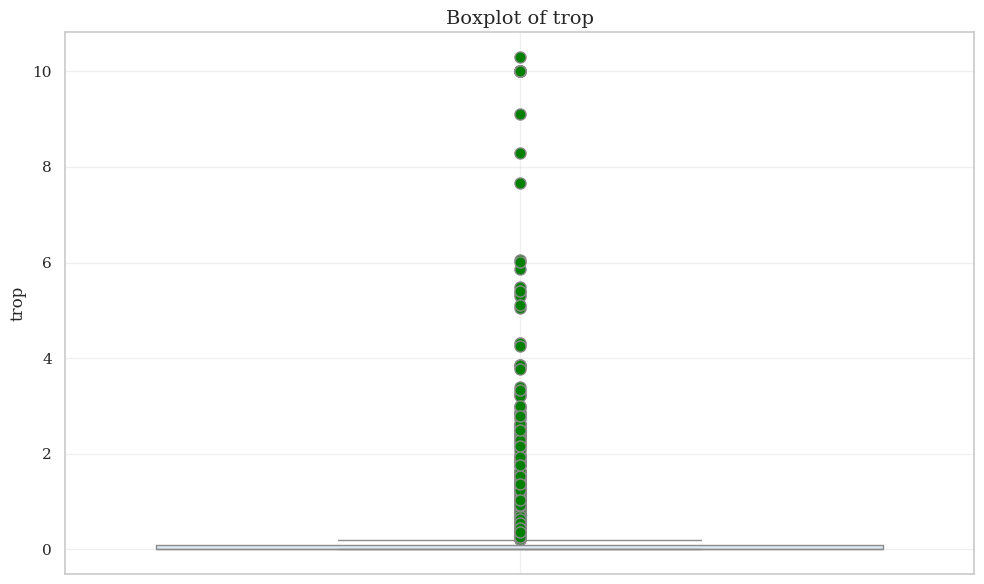

In [157]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(
        data=df,
        y=col,
        flierprops={'marker': 'o', 'markerfacecolor': 'green', 'markersize': 8, 'linestyle': 'none'}
    )
    plt.title(f'Boxplot of {col}', fontsize=14, )
    plt.ylabel(col, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

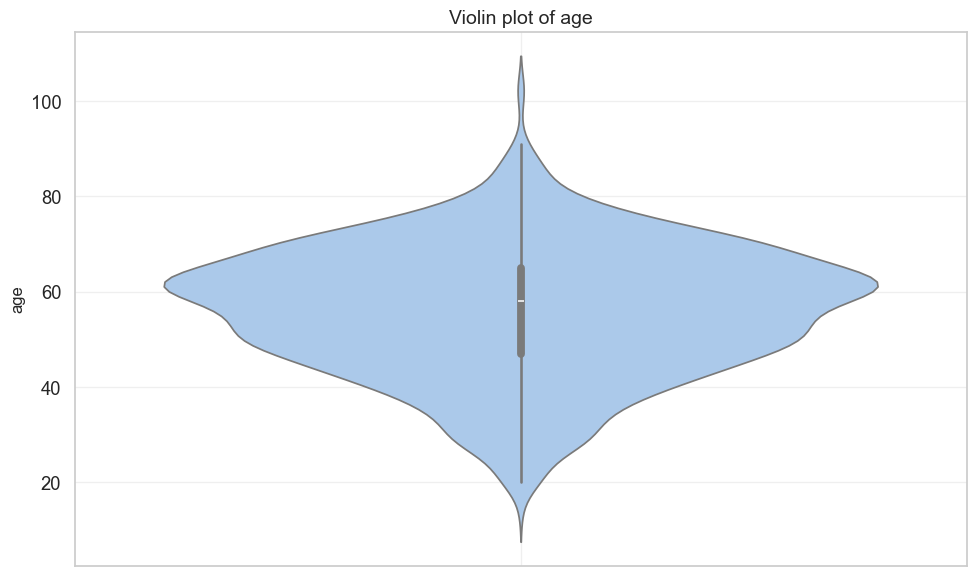

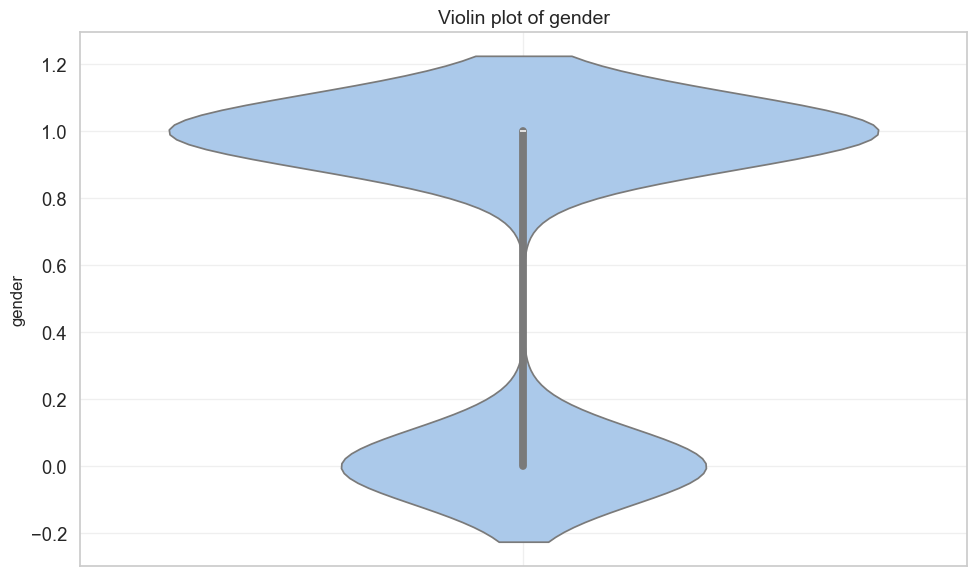

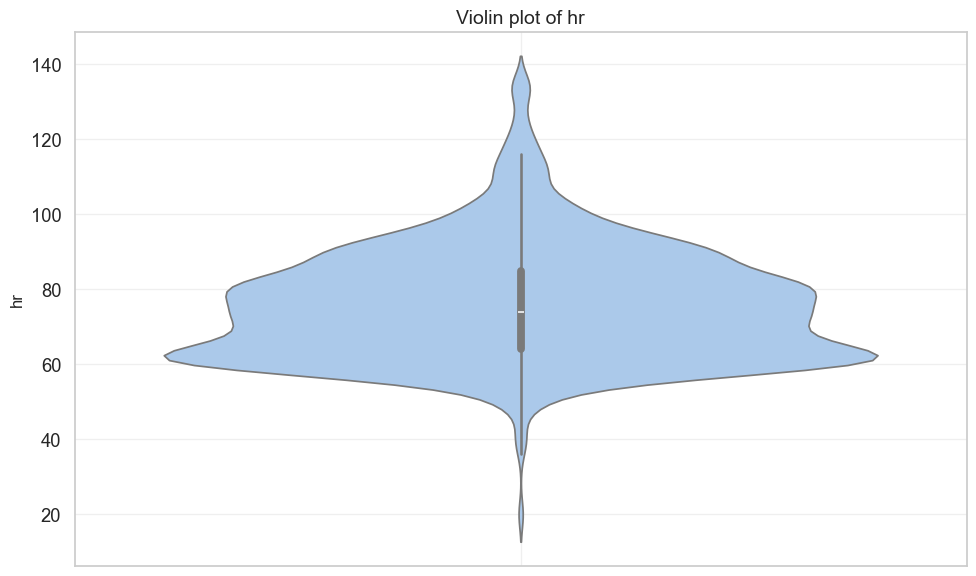

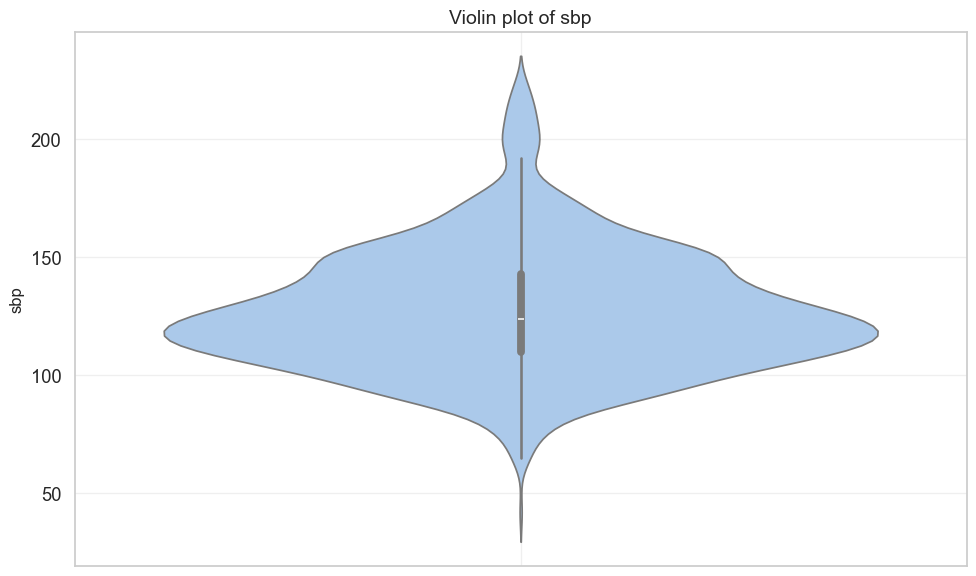

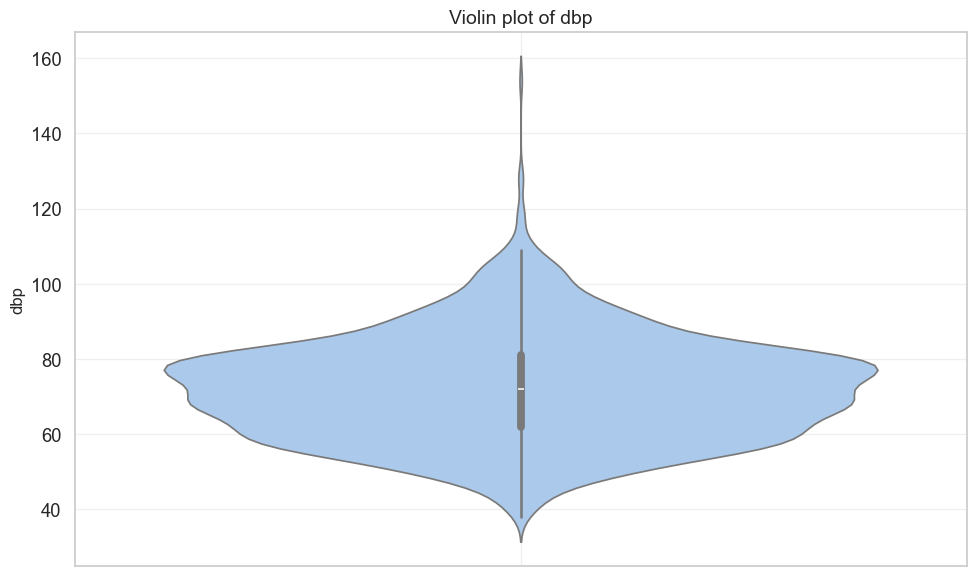

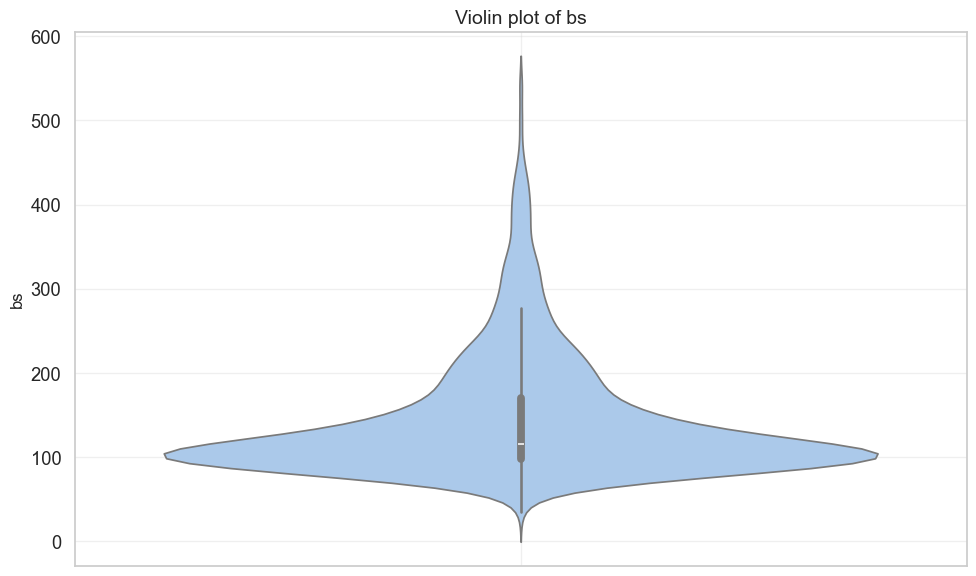

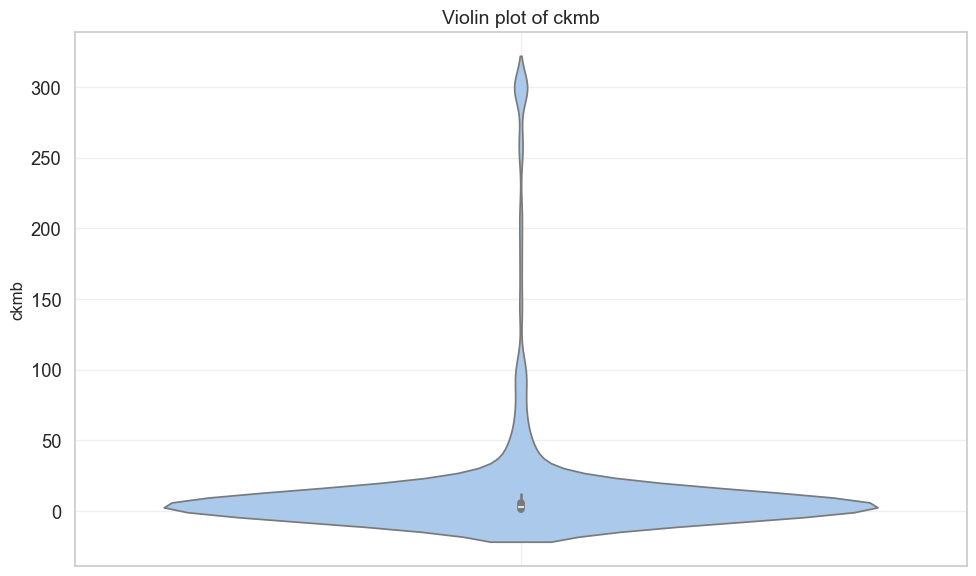

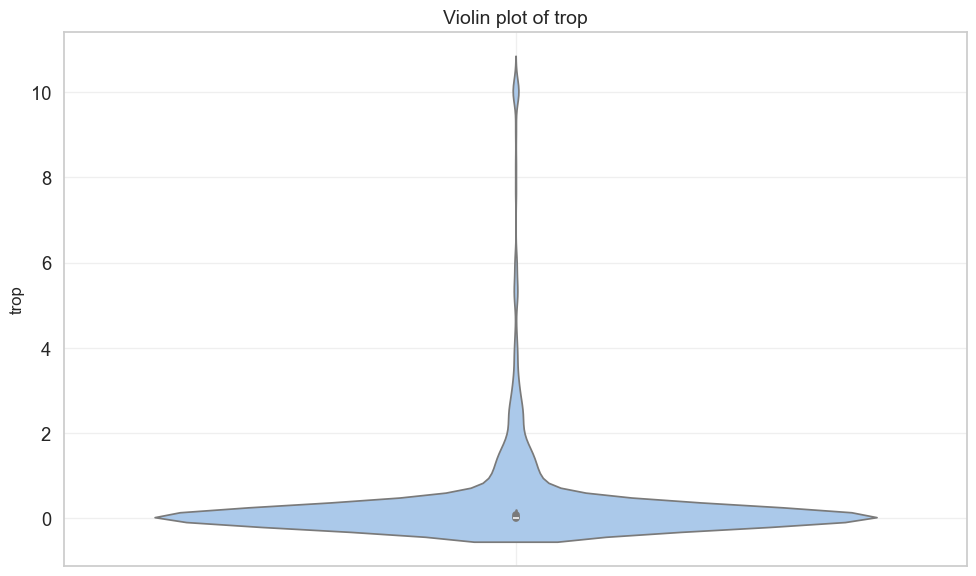

In [153]:
numeric_cols = df.select_dtypes(include='number').columns

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(10, 6))
    sns.violinplot(
        data=df,
        y=col,    
        inner='box'
    )
    plt.title(f'Violin plot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## Convertir 'res' a números:
Se decide convertir el campo resultados de categorías positivo y negativo a valores numéricoas 1 y 0 respectivamente, esto posibilitaría la mejor integración con el entrenamiento del modelo.

In [101]:
df_numeric = df.copy()
df_numeric['res'] = df_numeric['res'].map({'positive': 1, 'negative': 0})

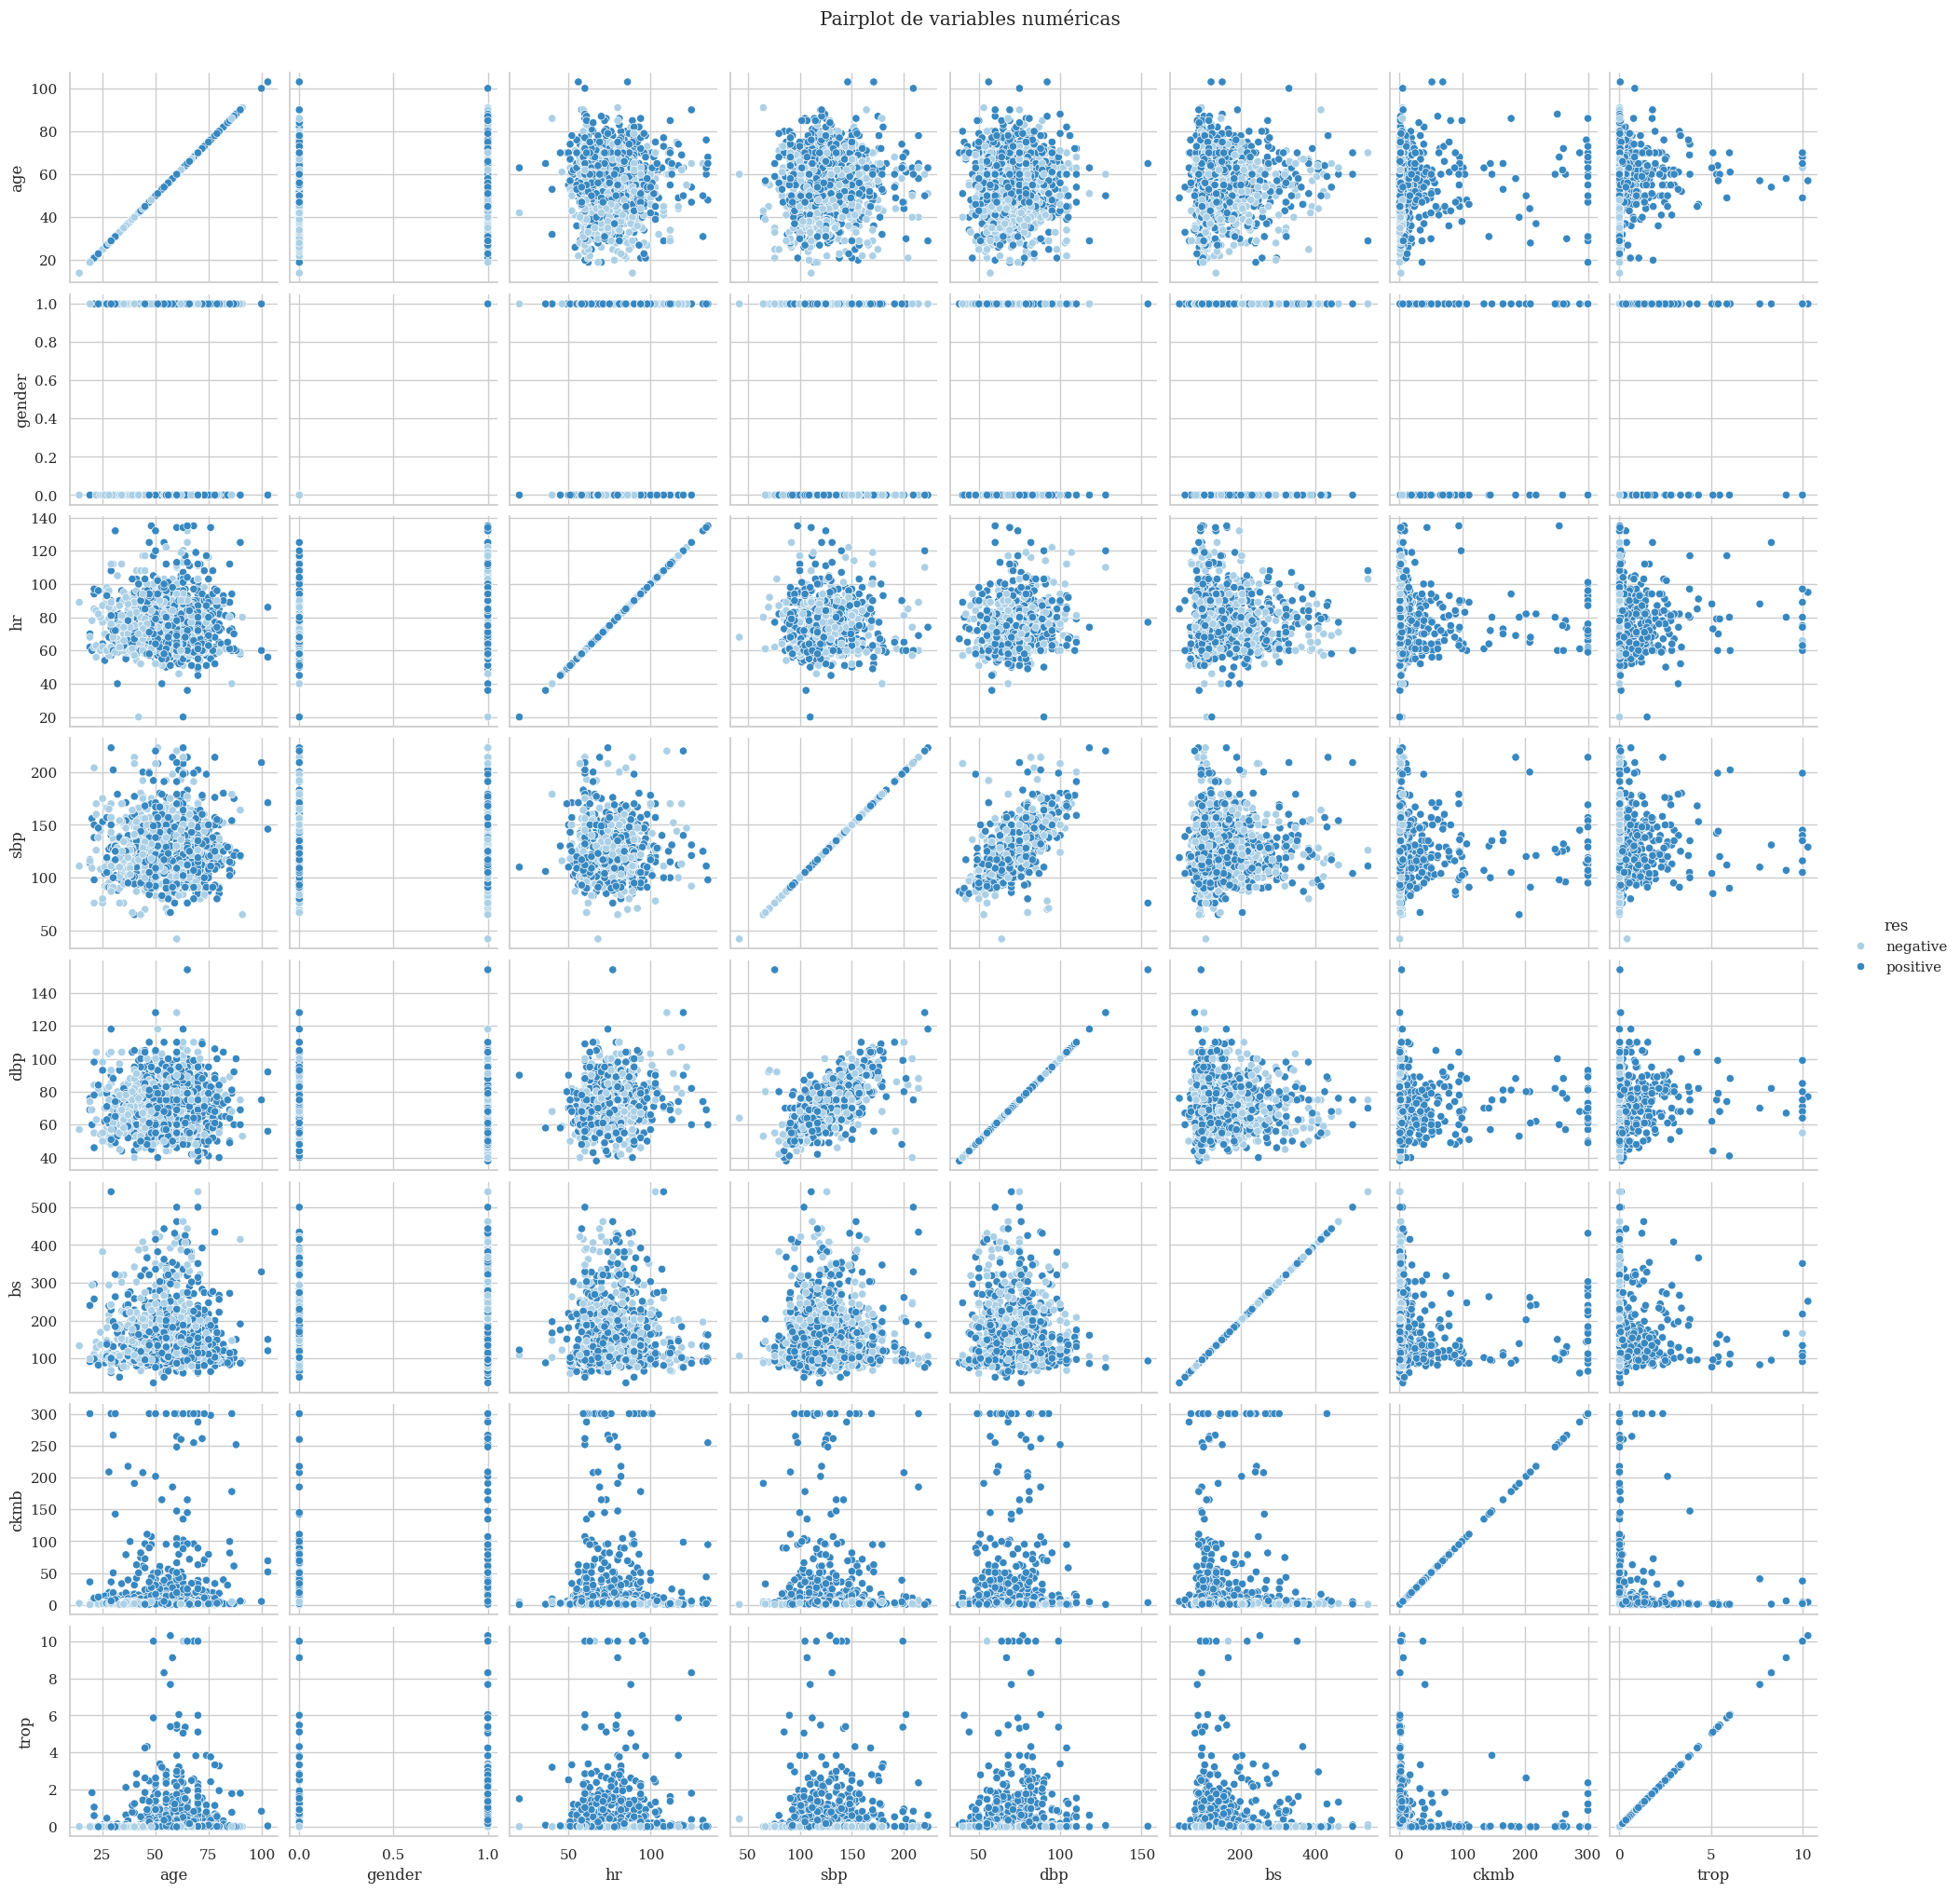

In [158]:
sns.pairplot(df, hue='res', palette='Blues', height=2.5, diag_kind=None)
plt.suptitle('Pairplot de variables numéricas', y=1.02)
plt.show()

In [ ]:
df_numeric = df_numeric.select_dtypes(include='number')
df_numeric.corr()

,age,gender,hr,sbp,dbp,bs,ckmb,trop,res
age,1.000000,-0.093560,0.002054,0.018116,0.004584,-0.005591,0.018088,0.089141,0.236977
gender,-0.093560,1.000000,0.015675,0.011920,-0.006859,0.005920,0.017172,0.064980,0.093764
hr,0.002054,0.015675,1.000000,-0.044928,0.116899,0.009918,-0.001818,0.039476,0.006758
sbp,0.018116,0.011920,-0.044928,1.000000,0.586154,0.021418,-0.016073,0.043764,-0.020985
dbp,0.004584,-0.006859,0.116899,0.586154,1.000000,-0.023872,-0.022463,0.043538,-0.010099
bs,-0.005591,0.005920,0.009918,0.021418,-0.023872,1.000000,0.045463,0.021070,-0.033562
ckmb,0.018088,0.017172,-0.001818,-0.016073,-0.022463,0.045463,1.000000,-0.016001,0.218043
trop,0.089141,0.064980,0.039476,0.043764,0.043538,0.021070,-0.016001,1.000000,0.229210
res,0.236977,0.093764,0.006758,-0.020985,-0.010099,-0.033562,0.218043,0.229210,1.000000


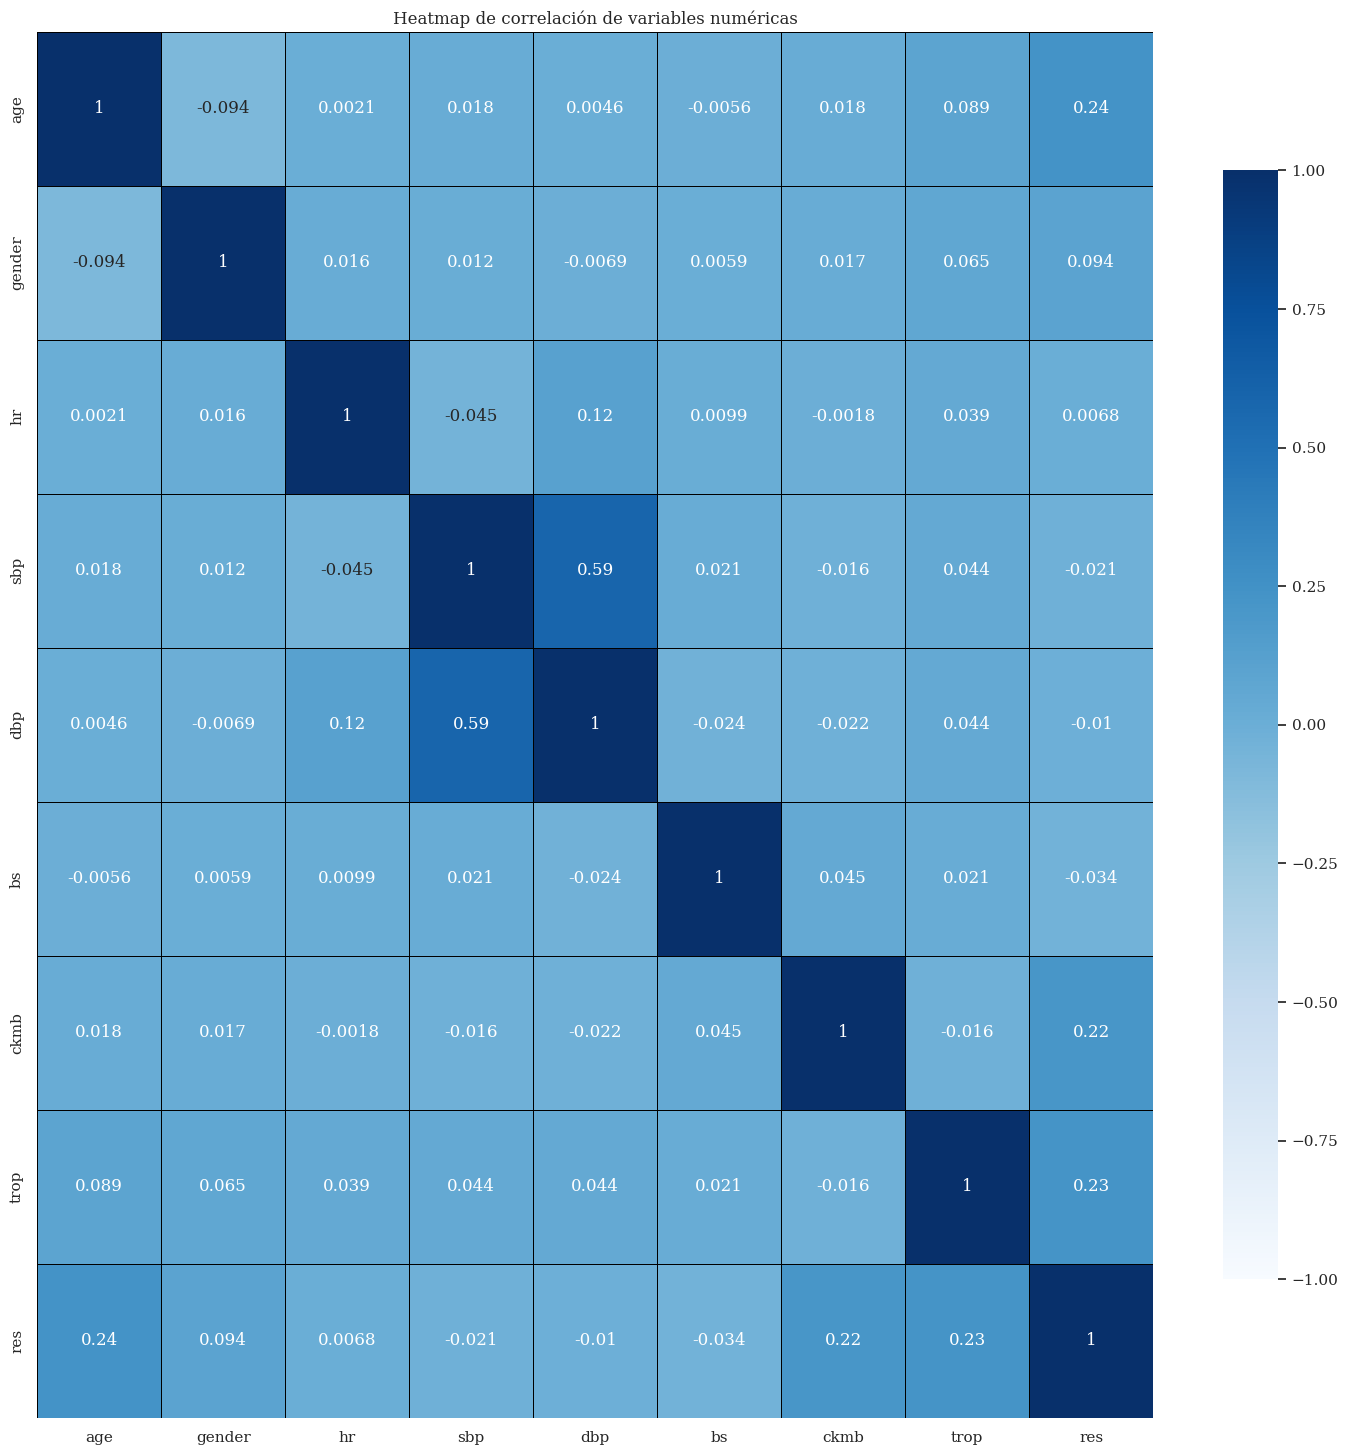

In [160]:
corr = df_numeric.corr()

plt.figure(figsize=(18, 18)) 
sns.heatmap(corr,
            annot=True, 
            cmap='Blues', 
            vmin=-1, vmax=1,  
            linewidths=0.5, 
            linecolor='black',  
            cbar_kws={"shrink": 0.8}) 
plt.title('Heatmap de correlación de variables numéricas', y=1)
plt.show()

In [105]:
df_numeric.to_csv(PROCESSED_DATA_DIR/'medicaldataset.csv', index=False)